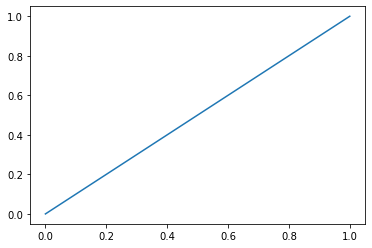

In [1]:
import matplotlib.pyplot as plt
plt.plot([0,1],[0,1]) # HACK

In [2]:
import torch
import numpy as np
from utils import reimporter
import ptvsd
ptvsd.enable_attach()
reimporter.freeze_modules()

In [3]:
reimporter.reimport()
from data_processing.FDDB_loading import pickle_face_data
from data_processing.FDDB import downloadFDDB
# downloadFDDB()
pickle_face_data(30000)

(9000, 1)
(9000, 1200)
(1000, 1)
(1000, 1200)


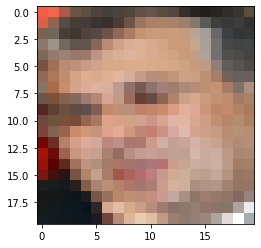

In [4]:
reimporter.reimport()
from data_processing.FDDB_loading import get_pickled_data
from utils.image_plotting import plot_image
train_faces, train_back, test_faces, test_back = get_pickled_data()

train_data = np.concatenate([train_faces, train_back], axis=0)
train_labels = np.concatenate([np.ones((len(train_faces),1)), np.zeros((len(train_back),1))], axis=0)

test_data = np.concatenate([test_faces, test_back], axis=0)
test_labels = np.concatenate([np.ones((len(test_faces),1)), np.zeros((len(test_back),1))], axis=0)

print(train_labels.shape)
print(train_data.shape)

print(test_labels.shape)
print(test_data.shape)
plot_image(train_data[0]/255)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


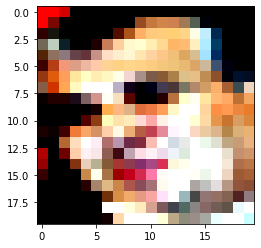

In [5]:
reimporter.reimport()
from data_processing.dataloader import DataLoader
train_dataloader = DataLoader(train_data, train_labels)
test_dataloader = DataLoader(test_data, test_labels)
image, label = train_dataloader[0]
plot_image(image)

In [14]:
reimporter.reimport()
from models.trainer import Trainer
from models.face_classifier import FaceClassifier
model = FaceClassifier(3, [16,32], [1000, 200, 2])
trainer = Trainer("testing", model, train_dataloader, test_dataloader)

In [15]:
trainer.fit(epochs=100, batch_size=32)

Epoch 1/100, Train_loss: tensor(0.4375), Val_loss:tensor(0.4109)
Epoch 2/100, Train_loss: tensor(0.3959), Val_loss:tensor(0.4019)
Epoch 3/100, Train_loss: tensor(0.3807), Val_loss:tensor(0.3887)
Epoch 4/100, Train_loss: tensor(0.3753), Val_loss:tensor(0.3862)
Epoch 5/100, Train_loss: tensor(0.3659), Val_loss:tensor(0.3794)
Epoch 6/100, Train_loss: tensor(0.3587), Val_loss:tensor(0.3964)
Epoch 7/100, Train_loss: tensor(0.3560), Val_loss:tensor(0.3843)
Epoch 8/100, Train_loss: tensor(0.3512), Val_loss:tensor(0.3915)
Epoch 9/100, Train_loss: tensor(0.3470), Val_loss:tensor(0.3753)
Epoch 10/100, Train_loss: tensor(0.3440), Val_loss:tensor(0.3754)
Epoch 11/100, Train_loss: tensor(0.3410), Val_loss:tensor(0.3829)
Epoch 12/100, Train_loss: tensor(0.3379), Val_loss:tensor(0.3764)
Epoch 13/100, Train_loss: tensor(0.3345), Val_loss:tensor(0.3788)


KeyboardInterrupt: 

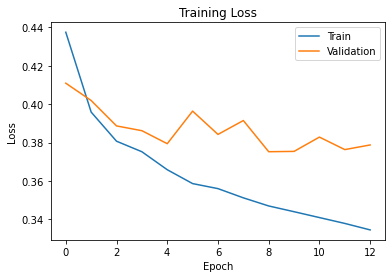

In [16]:
reimporter.reimport()
trainer.plot_loss()

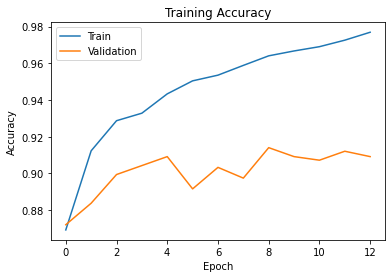

In [17]:
trainer.plot_acc()